In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("iris.csv")

In [3]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


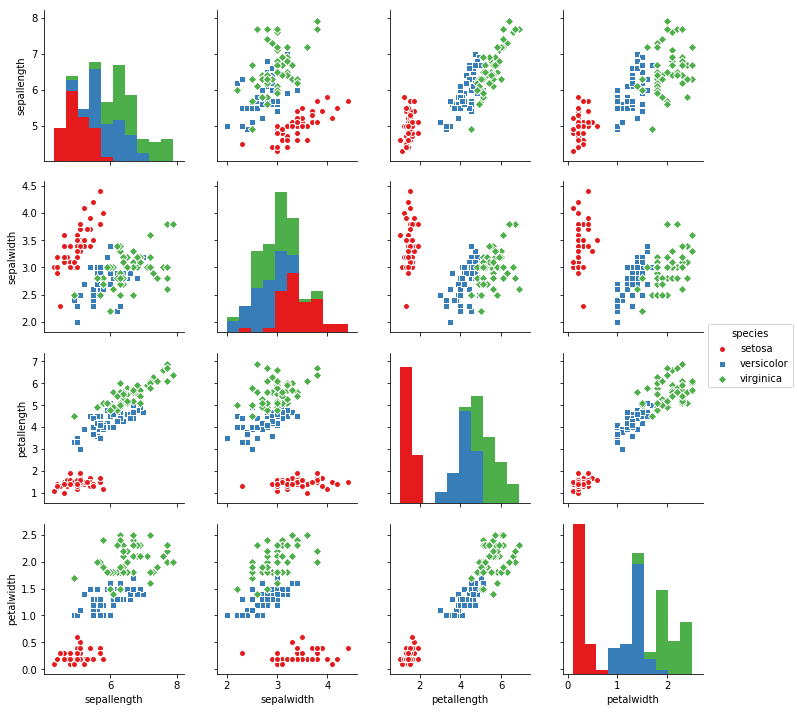

In [5]:
sns.pairplot(data, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set1")
plt.show()

In [6]:
x=data.iloc[0:,0:4]
y=data.iloc[:,4]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [9]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()

In [10]:
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
predictions = logReg.predict(x_test)
a=predictions
b=y_test

In [12]:
match=[i for i, j in zip(a, b) if i == j]
len(match)

33

In [13]:
score = logReg.score(x_test, y_test)
print(score)

0.868421052631579


In [14]:
from sklearn.svm import LinearSVC

In [15]:
model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
score= model.score(x_test,y_test)
print(score)

0.8421052631578947


In [17]:
from sklearn.svm import SVC

In [18]:
mod= SVC()
mod.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
score= mod.score(x_test,y_test)
print(score)

0.9473684210526315


In [20]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1).fit(x_train,y_train)

In [21]:
species = {'setosa':0,'versicolor':1,'virginica':2}
 
data.species = [species[item] for item in data.species]
print(data.head())

   sepallength  sepalwidth  petallength  petalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


In [22]:
X=data.iloc[:,0:2]
y=data.iloc[:,4]

In [23]:
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min(),X.iloc[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(),X.iloc[:, 1].max()
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [24]:
xx

array([[4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814],
       [4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814],
       [4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814],
       ...,
       [4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814],
       [4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814],
       [4.3       , 4.31837209, 4.33674419, ..., 7.84581395, 7.86418605,
        7.88255814]])

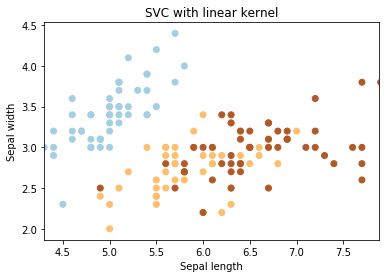

In [25]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()